In [1]:
import torch
from util import *
from criterion import LossMSE, CrossEntropy

import matplotlib.pyplot as plt
from models import *

torch.set_grad_enabled(False) # VERY IMPORTANT

%matplotlib inline
%load_ext autoreload
%autoreload 2

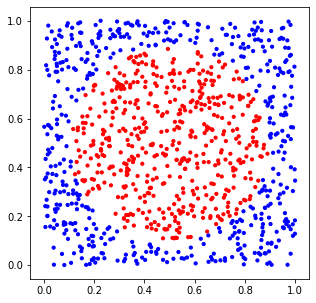

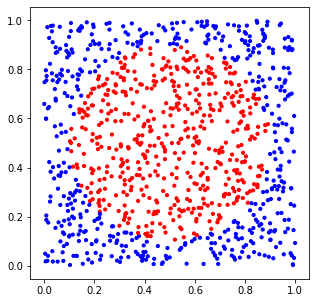

In [2]:
data, labels = generate_disc_set(1000)
validation_data, validation_labels = generate_disc_set(1000)

plot_preds(data, labels)
plot_preds(validation_data, validation_labels)

In [3]:
# Global training parameters
nb_epochs = 300
lr = 0.01
mini_batch_size = 100


#####Training model ReLu with Optimizer MSE#####
Epoch 1, loss : 0.8468161225318909
Epoch 31, loss : 0.8399644494056702
Epoch 61, loss : 0.7824243307113647
Epoch 91, loss : 0.6823129057884216
Epoch 121, loss : 0.6824643015861511
Epoch 151, loss : 0.5999287962913513
Epoch 181, loss : 0.45236802101135254
Epoch 211, loss : 0.4850403070449829
Epoch 241, loss : 0.44042760133743286
Epoch 271, loss : 0.4380114674568176
Epoch 300, loss : 0.4374183416366577
#####Training model ReLu with Optimizer CrossEntropy#####
Epoch 1, loss : 0.6712102293968201
Epoch 31, loss : 0.6931459903717041
Epoch 61, loss : 0.6931465864181519
Epoch 91, loss : 0.693146824836731
Epoch 121, loss : 0.6931468844413757
Epoch 151, loss : 0.6931469440460205
Epoch 181, loss : 0.6931469440460205
Epoch 211, loss : 0.6931469440460205
Epoch 241, loss : 0.6931470632553101
Epoch 271, loss : 0.6931470632553101
Epoch 300, loss : 0.6931470632553101
#####Training model Tanh with Optimizer MSE#####
Epoch 1, loss : 0.6758632659912109
Epoc

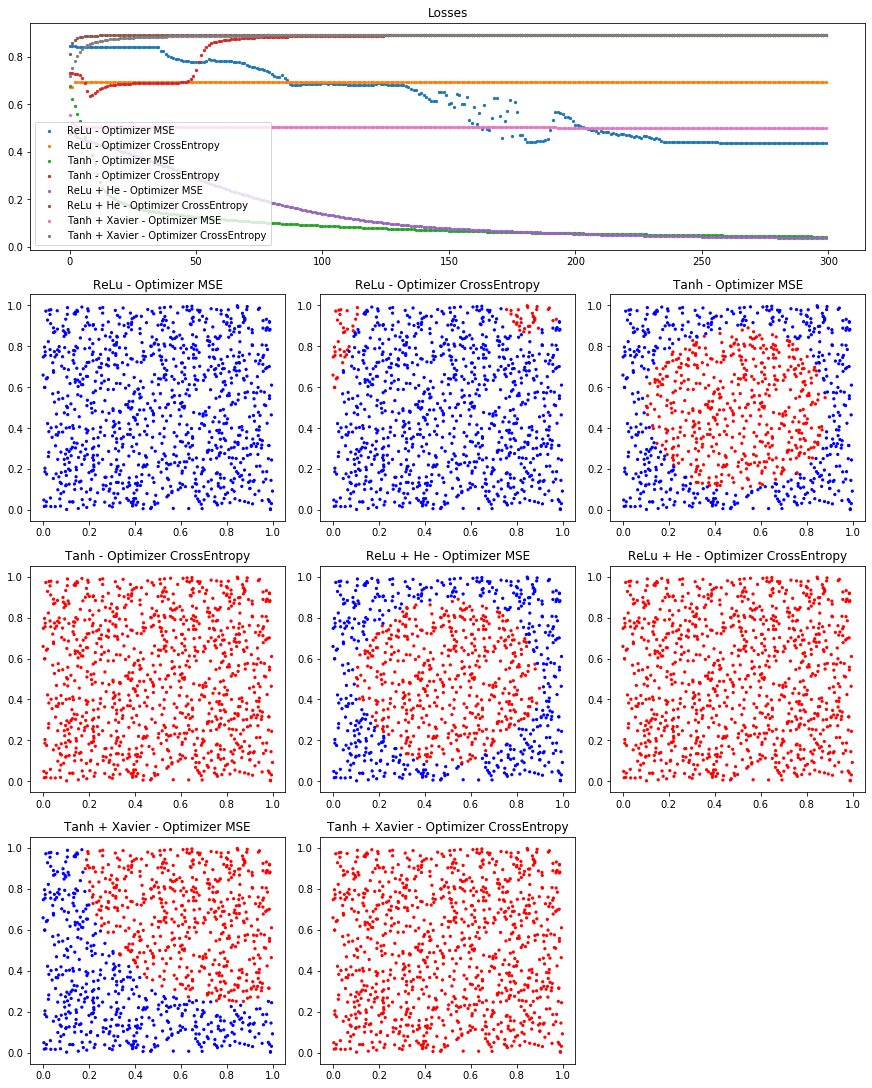

In [8]:
fig3 = plt.figure(constrained_layout=True, figsize=(12,15))
gs = fig3.add_gridspec(4, 3)
ax_losses = fig3.add_subplot(gs[:1, :])
ax_losses.set_title('Losses')
ax_mod1 = fig3.add_subplot(gs[1, 0])

ax_mod2 = fig3.add_subplot(gs[1, 1])
ax_mod3 = fig3.add_subplot(gs[1, 2])
ax_mod4 = fig3.add_subplot(gs[2, 0])
ax_mod5 = fig3.add_subplot(gs[2, 1])
ax_mod6 = fig3.add_subplot(gs[2, 2])
ax_mod7 = fig3.add_subplot(gs[3, 0])
ax_mod8 = fig3.add_subplot(gs[3, 1])

models = [Model1, Model2, Model3, Model4]
axes   = [ax_mod1, ax_mod2, ax_mod3, ax_mod4, ax_mod5, ax_mod6, ax_mod7, ax_mod8]

tentative = 0
for model in models:
    for crit in [LossMSE(model), CrossEntropy(model)]:
        print("#####Training model {} with {}#####".format(model.name, crit))
        ax = axes[tentative]
        model.reset()
        losses, model_trained = train_model(model, data, labels, criterion=crit, lr=lr, nb_epochs=nb_epochs)
        ax_losses.scatter(range(len(losses)), losses, s=5, label="{} - {}".format(model.name, crit))
        ax.set_title('{} - {}'.format(model.name, crit))
        preds = model_trained(validation_data)
        validation_labels = torch.max(preds, 1).indices

        c = ["red" if l.item() == 1 else "blue" for l in validation_labels]

        ax.scatter(validation_data[:,0], validation_data[:,1], s=5, c=c)
        tentative += 1
ax_losses.legend()
